In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

In [2]:
batch_size = 50

In [3]:
path = r'C:\Users\Admin\Desktop\program\datasets\cifar-10-batches-py\data_batch_1'

def _unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
d = _unpickle(path)

In [5]:
d.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [6]:
#num_images, img_size = d[b'data'].shape[0], d[b'data'].shape[1]

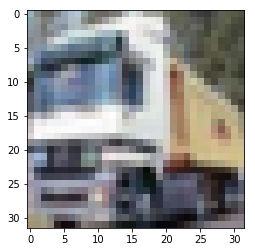

In [7]:
plt.imshow(d[b'data'][1].reshape(3,1024).reshape(3,32,32).transpose((1,2,0)))

In [8]:
# first, convert the entire file into a series of images
# then lazy load every image or a batch of images(generator function)

In [9]:
def cifar_parser(file_path, batch_size):
    ''' Takes the path to a pickled file as input and returns a numpy
        array. 'iter()' can be used to create an iterator and 'next()'
        can be used to generate a batch of images everytime.
        
        Args:
            file_path : The full path of the file as a raw string
            batch_size : The number of images to generate at each batch
    '''
    
    
    d = _unpickle(file_path)
    num_images, img_size = d[b'data'].shape[0], d[b'data'].shape[1]
    
    # batch_data is just the entire data of the pickle file as a numpy array
    # which is reshaped in such a way that it is easy to create an iterator
    # of the array and generate a batch everytime 'next(batch_size)' is run
    batch_data = d[b'data'][:].reshape(num_images//batch_size,batch_size,3,img_size//3).reshape(num_images//batch_size,batch_size,3,int((img_size//3)**0.5),int((img_size//3)**0.5)).transpose((0,1,3,4,2))
    return batch_data

In [10]:
def cifar_iterator(folder_path, batch_size):
    ''' function that takes the folder path
        where all the cifar_10 files are present. 'iter()' can be used 
        to create an iterator and 'next()' can be used to generate a
        batch of images everytime
        
        Args:
            folder_path : The full path of the folder where all the cifar_10
                            files are present. raw string input
            batch_size : The number of images to generate at each batch
    '''
    
    # make an os.listdir() to get the names of all the files
    # get their paths by joining the folder path and the file name
    
    # The function will yield the 'batch_data' for each file and the 'batch_data'
    # can then be iterated "iter(batch_data)" during training to get each batch
    
    # so we are creating a generator from a generator
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        yield cifar_parser(file_path, batch_size)

In [11]:
#file_iterator = cifar_iterator(r'C:\Users\Admin\Desktop\program\datasets\cifar-10-batches-py', 50)

#num_files = len(os.listdir(r'C:\Users\Admin\Desktop\program\datasets\cifar-10-batches-py'))

def batch_generator(folder_path, batch_size):
    file_iterator = cifar_iterator(folder_path, batch_size)
    num_files = len(os.listdir(folder_path))
    
    for _ in range(num_files):
        file_data = next(file_iterator) # load a file and parse it into (200,50,32,32,3) array
        batch_iterator = iter(file_data)
        
        for _ in range(file_data.shape[0]):
            batch_data = next(batch_iterator) # outputs a batch of size (50,32,32,3) from the file of size (200,50,32,32,3)
            yield batch_data

In [12]:
f_path = r'C:\Users\Admin\Desktop\program\datasets\cifar-10-batches-py'
# batch_size = 50

In [13]:
batch = batch_generator(f_path, 50)